# Predicting the Weather 

### Linear Regression - Univariate and Multivariate 



## Dataset Description

The `temperatures.csv` dataset is designed for bias correction of next-day maximum and minimum air temperature forecasts produced by the Local Data Assimilation and Prediction System (LDAPS) operated by the Korea Meteorological Administration. It covers summer seasons from 2013 to 2017 in Seoul, South Korea.

Dataset Summary:
- **Feature Type:** Real
- **Instances:** 7586
- **Input Features:** 21 (including present-day temperature data, LDAPS model forecasts, and geographical information)
- **Output:** Next-day maximum (Next_Tmax)


We want to predict the next day temperature given the various features

#### Libraries used

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler

#### Importing the Dataset

In [27]:

df = pd.read_csv('temperatures.csv')
features = df.iloc[:, :21]
y_train = df.iloc[:, -1]



## Univariate Regression

In this part, we develop a univariate regression model using maximum temperature on present day `(Present_Tmax)` to predict the next day temperature `(Next_Tmax)`

#### Feature Extraction:

Extracting the `Present_Tmax` column as input and the `Next_Tmax` column as output from the dataset.

In [28]:
input_data = df['Present_Tmax'].values
output_data = df['Next_Tmax'].values

#### Splitting the dataset
We make a 70 30 split to divide the dataset into training and test dataset using sklearn library

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(input_data, output_data, test_size=0.3)



### Learn the parameters
In this part, we fit the linear regression parameters $\theta_0$ and $\theta_1$ to our dataset.

The objective of linear regression is to minimize the cost function

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left(\hat {y}^{(i)} - y^{(i)}\right)^2$$

where the hypothesis $\hat {y}^{(i)}$ is the predicted value for a given x and is given by the linear model and $m$ is the total number of datapoints
$$ \hat {y} =  h_\theta(x) = \theta_0 + \theta_1 x$$

The parameters of our model are the $\theta_j$ values. We will adjust these values to minimize cost $J(\theta)$ using batch gradient descent algorithm. In batch gradient descent, each
iteration performs the update

$$ \theta_0 = \theta_0 - \alpha \frac{1}{m} \sum_{i=1}^m \left( \hat {y}^{(i)} - y^{(i)}\right)$$

$$ \theta_1 = \theta_1 - \alpha \frac{1}{m} \sum_{i=1}^m \left( \hat {y}^{(i)} - y^{(i)}\right)x^{(i)}$$

With each step of gradient descent, our parameters $\theta_0$ and $\theta_1$ come closer to the optimal values that will achieve the lowest cost $J(\theta)$.

In [30]:


def cost_SLR(Y_train, X_train, theta0, theta1):
    m = len(X_train)
    total_cost = 0
    
    for i in range(m):
        total_cost += (Y_train[i] - (theta0 + theta1 * X_train[i])) ** 2
    
    cost = (1 / (2 * m)) * total_cost
    return cost

def predict_SLR(X_train, theta0, theta1):
    if isinstance(X_train, (int, float)):
        X_train = [X_train]
    y_predicted = [theta0 + (theta1 * x) for x in X_train]
    return y_predicted

def gradient_descent_SLR(X_train, Y_train, alpha, epochs):
    J = []  
    theta0 = 0.5
    theta1 = 0.5
    m = len(X_train)

    for epoch in range(epochs):
        Y_pred = [theta0 + theta1 * x for x in X_train]
        cost = cost_SLR(Y_train, X_train, theta0, theta1)
        J.append(cost)

        sum_error = sum([(Y_pred[i] - Y_train[i]) for i in range(m)])
        theta0 = theta0 - (alpha * sum_error / m)

        sum_error_x = sum([(Y_pred[i] - Y_train[i]) * X_train[i] for i in range(m)])
        theta1 = theta1 - (alpha * sum_error_x / m)

    cost = cost_SLR(Y_train, X_train, theta0, theta1)
    
    J.append(cost)

    return theta0, theta1, J


#### Running Linear Regression

In [31]:
#you will have to set these values to get the best fit model for linear regression
n_epoch = 1000
alpha = 0.001

#this is the call to the gradient descent function
#here X_train and Y_train are the arrays that you formed above using the dataset
theta0, theta1, J = gradient_descent_SLR(X_train,Y_train,alpha,n_epoch)
print('Predicted theta0 = %.4f, theta1 = %.4f, cost = %.4f' % (theta0, theta1, J[-1]))


Predicted theta0 = 0.6192, theta1 = 0.9912, cost = 3.5425


#### Plotting results

 Below is the graph with the original dataset points and the linear regression model using our learned values of theta0 and theta1


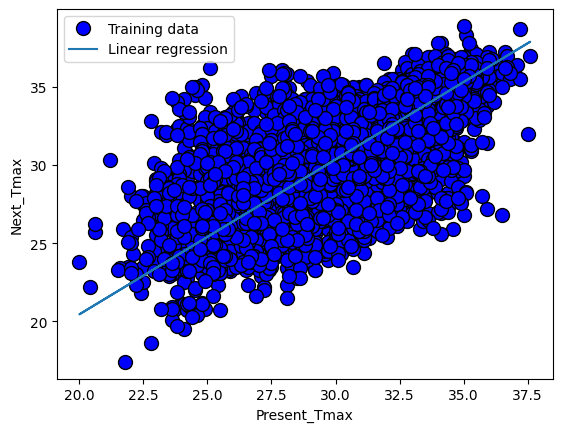

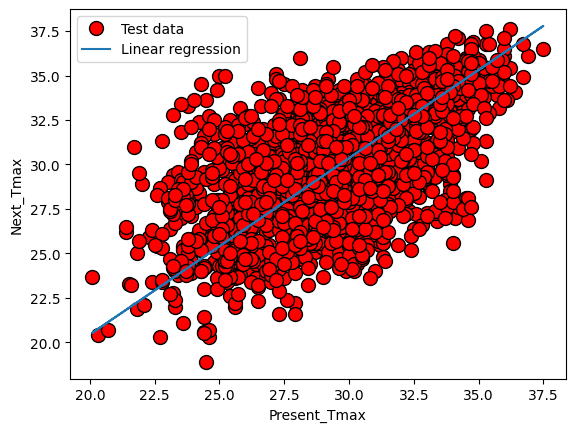

In [32]:
y_pred_list_train = list()
for x in X_train:
    y_pred_list_train.append(predict_SLR(x, theta0, theta1))

plt.plot(X_train, Y_train, 'bo', ms=10, mec='k')
plt.ylabel('Next_Tmax')
plt.xlabel('Present_Tmax')
plt.plot(X_train, y_pred_list_train, '-')
plt.legend(['Training data', 'Linear regression'])
plt.show()

y_pred_list_test = list()
for x in X_test:
    y_pred_list_test.append(predict_SLR(x, theta0, theta1))

plt.plot(X_test, Y_test, 'ro', ms=10, mec='k')
plt.ylabel('Next_Tmax')
plt.xlabel('Present_Tmax')
plt.plot(X_test, y_pred_list_test, '-')
plt.legend(['Test data', 'Linear regression'])
plt.show()

### Finding the Correlation
Correlation is used to assess the association between features (input variables) and the target variable (output variable) in a dataset.

* A positive correlation indicates a direct, linear relationship: as one variable increases, the other tends to increase as well.
* A negative correlation indicates an inverse, linear relationship: as one variable increases, the other tends to decrease.
* A correlation of 0 suggests no linear relationship between the variables.

<br>
We will plot the correlation of the top 5 features that have the best correlation with Next_Tmax






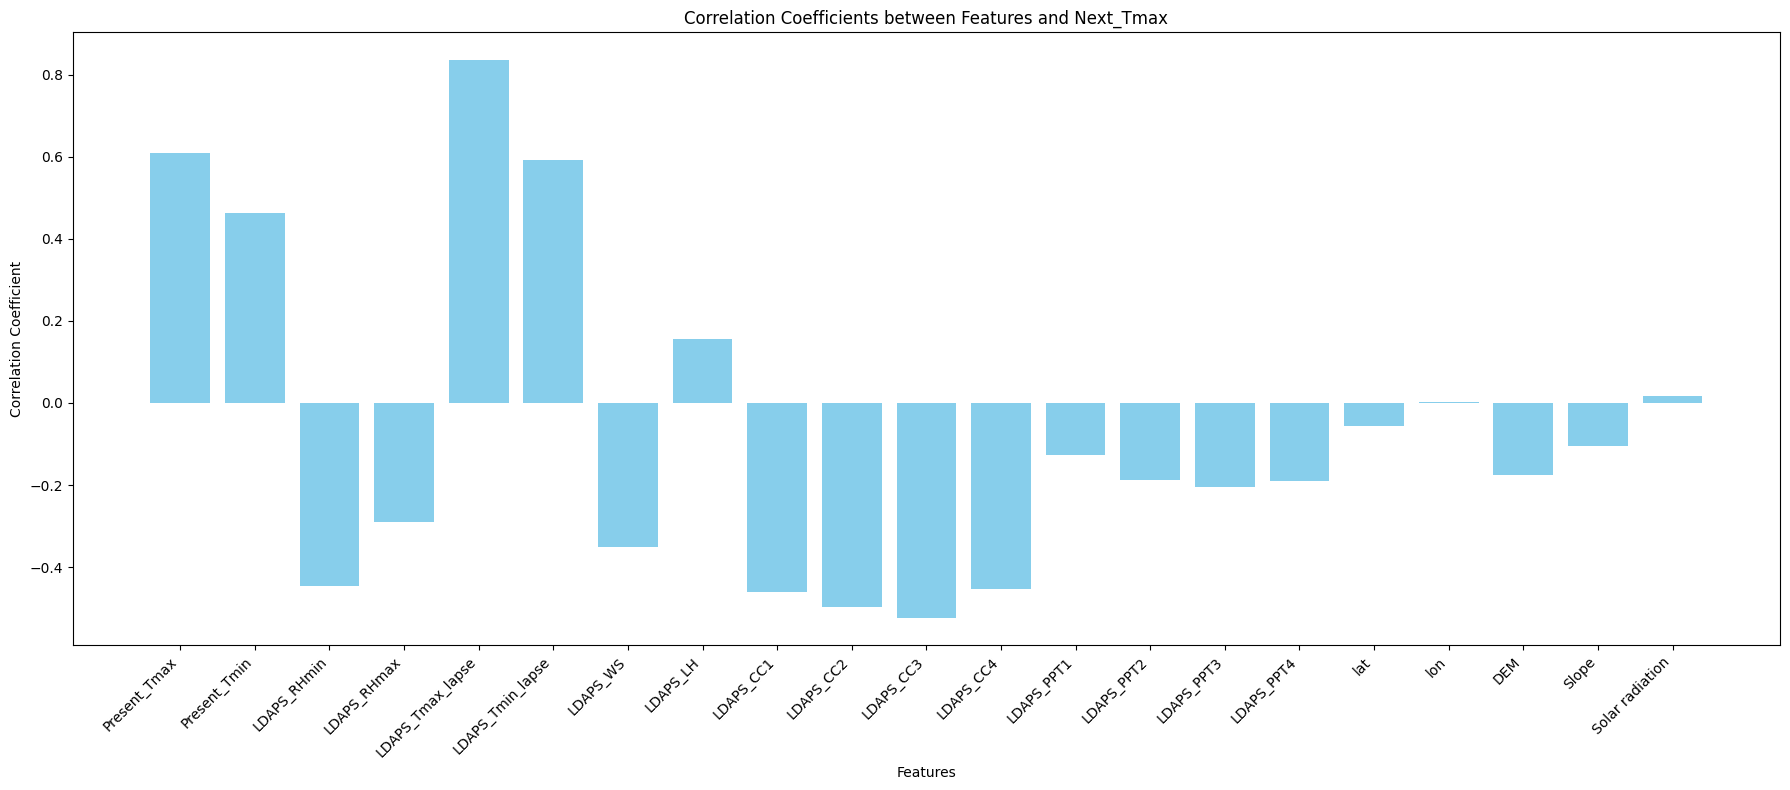

In [33]:
#the features parameter is all the 22 columns other than the output feature in the dataset
correlations = np.corrcoef(features, y_train, rowvar=False)[:21, -1]
column_names = df.columns[:21]
plt.figure(figsize=(18, 8))
plt.bar(range(1, 22), correlations, tick_label=column_names, color='skyblue')
plt.title('Correlation Coefficients between Features and Next_Tmax')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation = 45, ha='right')
plt.tight_layout()
plt.show()

#### Top 5 features here:
Present_Tmax, 
Present_Tmin, 
LDAPS_Tmax_lapse, 
LDAPS_Tmin_lapse, 
LDAPS_LH

### Improving Performance

We try to improve performance of the model, i.e further reducing the cost, by selecting some other input feature instead of `Present_Tmax`, keeping the desired output as `Next_Tmax`

In [34]:
LDAPS_Tmax_lapse = df['LDAPS_Tmax_lapse'].values
X_trainL, X_testL, Y_trainL, Y_testL = train_test_split(LDAPS_Tmax_lapse, output_data, test_size=0.3)

n_epoch = 1000
alpha = 0.001

#this is the call to the gradient descent function
#here X_train and Y_train are the arrays that you formed above using the dataset
theta0, theta1, J = gradient_descent_SLR(X_trainL,Y_trainL, alpha, n_epoch)
print('Predicted theta0 = %.4f, theta1 = %.4f, cost = %.4f' % (theta0, theta1, J[-1]))

Predicted theta0 = 0.5512, theta1 = 1.0016, cost = 1.5337


## Multi-Variate Linear Regression 

We will now train a multivariate regression model on the same dataset. Instead of using just one input feature, we will now use the `Top-5 input features`. These features will be used to predict the next day temperature `(Next_Tmax)`

#### Feature Extraction:

Extracting the Top-5 features from the dataset

In [35]:
input_data = df[['Present_Tmax', 'Present_Tmin', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_LH']]

output_data = df['Next_Tmax'].values

#### Splitting the dataset
Making a `70 30` split to divide the dataset into training and test dataset which will result in 4 variables: X_train, Y_train, X_test, Y_test

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(input_data, output_data, test_size=0.3)

## Learn the parameters for Multivariate Regression

In multivariate regression, we predict the output using multiple input features. The model has the form:

$$
\hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n
$$

where:
- $\hat{y}$ is the predicted value
- $x_i$ represents each input feature
- $\theta_i$ are the parameters of our model

The cost function for multivariate regression is an extension of the univariate case and is given by:

$$
J(\Theta) = \frac{1}{2m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})^2
$$

Here, $\Theta$ represents the parameter vector $(\theta_0, \theta_1, ..., \theta_n)$, and $m$ is the number of training examples.

To minimize the cost function $J(\Theta)$, we use a method such as gradient descent, where each parameter $\theta_j$ is updated as follows:

$$
\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})x_j^{(i)}
$$

- $\alpha$ is the learning rate
- The summation is over all training examples


With each iteration of gradient descent, the parameters $\Theta$ come closer to the optimal values that minimize the cost function $J(\Theta)$.

#### Linear Regression:



In [37]:
def normalaize_data(X_train):
    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)
    
    X_train_normalized = (X_train - mean) / std
    return X_train_normalized

X_train_normalized = normalaize_data(X_train)

    
def predict_MLR(X_train_normalized, theta):  #decide on the variables for this function
    if isinstance(X_train_normalized, (int, float)):
        X_train_normalized = [X_train_normalized]
    y_pred = [np.dot(theta, x) for x in X_train_normalized]
    return y_pred

def cost_MLR(Y_train, X_b, theta):  #decide on the parameters for this function
    m = len(X_b)
    total_cost = 0
    
    for i in range(m):
        total_cost += (Y_train[i] - np.dot(theta, X_b[i])) ** 2
    
    cost = (1 / (2 * m)) * total_cost
    return cost

#You will need to use a bias term as well
def gradient_descent_MLR(X_train_normalized, Y_train, alpha, epochs):
    J = []  
    num_features = X_train_normalized.shape[1]
    theta = np.zeros(num_features + 1)  

    for epoch in range(epochs):
        X_b = np.c_[np.ones((len(X_train_normalized), 1)), X_train_normalized]  
        Y_pred = np.dot(X_b, theta)  
        
        cost = cost_MLR(Y_train, X_b, theta)  
        J.append(cost)

        errors = Y_pred - Y_train
        gradient = (1 / len(X_train_normalized)) * np.dot(errors, X_b)  
        theta -= alpha * gradient 
        
    cost = cost_MLR(Y_train, X_b, theta)  
    J.append(cost)
    return theta, J
    
    

#### Run the Regression



In [38]:
#decide on an appropriate value of n_epoch and alpha
# Return J for every epoch and Plot it against # of epochs.
n_epoch = 1000
learning_rate = 0.01
theta, J = gradient_descent_MLR(X_train_normalized, Y_train,learning_rate, n_epoch)


### Visualizing the costs
You can run the following cell to see how your costs change with each epoch.

Text(0, 0.5, 'cost')

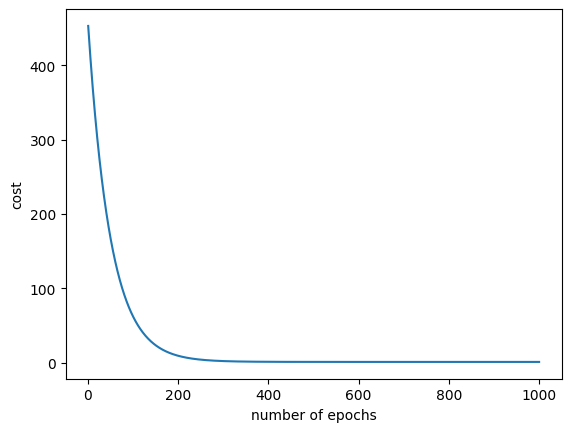

In [39]:
plt.plot(np.arange(1,n_epoch+1),J[1:])
plt.xlabel("number of epochs")
plt.ylabel("cost")

### All input features

We will now use `ALL` input features to predict `Next_Tmax` and compare with previous


In [40]:
all_features = df[['Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','lat','lon','DEM','Slope','Solar radiation']]
output = df['Next_Tmax'].values

Performing 70-30 split on the dataset again.

In [41]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(all_features, output, test_size=0.3)

Call the gradient descent function again

In [42]:
def normalaize_data(X_train1):
    mean = np.mean(X_train1, axis=0)
    std = np.std(X_train1, axis=0)
    
    X_train1_normalized = (X_train1 - mean) / std
    return X_train1_normalized

X_train1_normalized = normalaize_data(X_train)

def predict_MLR(X_train1_normalized, theta):  #decide on the variables for this function
    if isinstance(X_train1_normalized, (int, float)):
        X_train1_normalized = [X_train1_normalized]
    y_pred = [np.dot(theta, x) for x in X_train1_normalized]
    return y_pred

def cost_MLR(Y_train1, X_b, theta):  #decide on the parameters for this function
    m = len(X_b)
    total_cost = 0
    
    for i in range(m):
        total_cost += (Y_train1[i] - np.dot(theta, X_b[i])) ** 2
    
    cost = (1 / (2 * m)) * total_cost
    return cost

def gradient_descent_MLR(X_train1_normalized, Y_train1, alpha, epochs):
    J1 = []  
    num_features = X_train1_normalized.shape[1]
    theta = np.zeros(num_features + 1)  

    for epoch in range(epochs):
        X_b = np.c_[np.ones((len(X_train1_normalized), 1)), X_train1_normalized]  
        Y_pred = np.dot(X_b, theta)  
        
        cost = cost_MLR(Y_train1, X_b, theta)  
        J1.append(cost)

        errors = Y_pred - Y_train1
        gradient = (1 / len(X_train1_normalized)) * np.dot(errors, X_b)  
        theta -= alpha * gradient 
        
    cost = cost_MLR(Y_train1, X_b, theta)  
    J1.append(cost)
    
    return theta, J1

n_epoch = 1000
learning_rate = 0.01
theta, J1 = gradient_descent_MLR(X_train1_normalized, Y_train1,learning_rate, n_epoch)



Visualise the cost again.

Text(0.5, 1.0, 'All features cost visualization')

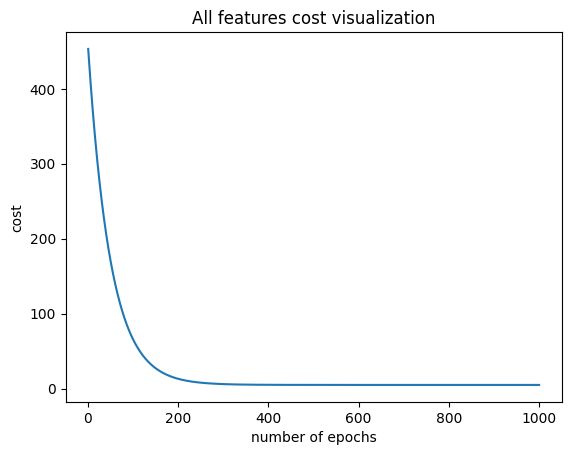

In [43]:
plt.plot(np.arange(1,n_epoch+1),J1[1:])
plt.xlabel("number of epochs")
plt.ylabel("cost")
plt.title("All features cost visualization")

Plotting the final cost values for the previous model (with 5 features) and the new model (with all features)
<br>


1.2877113040462267 4.86255190743159


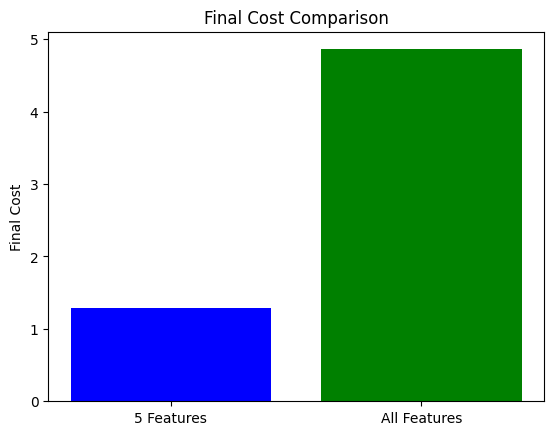

In [44]:
final_cost_5_features = J[-1]
final_cost_all_features = J1[-1]

print(final_cost_5_features, final_cost_all_features)

plt.bar(['5 Features', 'All Features'], [final_cost_5_features, final_cost_all_features], color=['blue', 'green'])
plt.ylabel('Final Cost')
plt.title('Final Cost Comparison')
plt.show()

### Analysis

* Change the learning rates to `0.01`, `0.1`, and `1` and record the performance in terms of convergence plots ie. cost vs iterations for each learning rate

* Change the train-test split ratios to `60-40`, `70-30` and `80-20` and record the performance in terms of convergence plots for each ratio i.e cost vs iterations for each split ratio

* Change the number of iterations to `250`, `500`, `750` and `1000` and record the performance in terms of convergence plots for a range of iterations i.e cost vs range of iterations



#### Effect of learning rate
Use 70-30 split and number of iterations = 1000

In [45]:
#choosing the five feature model since it has a lower final cost
n_epoch = 1000
learning_rate = 1
theta1, J2 = gradient_descent_MLR(X_train_normalized, Y_train,learning_rate, n_epoch)

n_epoch = 1000
learning_rate = 0.1
theta0_1, J3 = gradient_descent_MLR(X_train_normalized, Y_train,learning_rate, n_epoch)

n_epoch = 1000
learning_rate = 0.01
theta0_01, J4 = gradient_descent_MLR(X_train_normalized, Y_train,learning_rate, n_epoch)

print(J2[-1], J3[-1], J4[-1])


/var/folders/t3/21q0_vxd1kng6t2gphmz3_9c0000gn/T/ipykernel_91202/3314985927.py:21: RuntimeWarning: overflow encountered in scalar add
  total_cost += (Y_train1[i] - np.dot(theta, X_b[i])) ** 2
/var/folders/t3/21q0_vxd1kng6t2gphmz3_9c0000gn/T/ipykernel_91202/3314985927.py:21: RuntimeWarning: overflow encountered in scalar power
  total_cost += (Y_train1[i] - np.dot(theta, X_b[i])) ** 2


inf 1.2867848817698782 1.2877113040462267


Plot the `final` value of the cost against the learning rates

Text(0, 0.5, 'Cost')

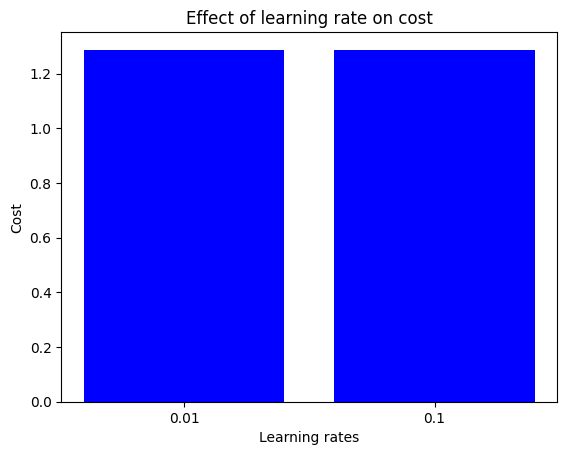

In [46]:
learning_rate_list = ['0.01', '0.1' , '1']
cost_list = [J4[-1], J3[-1], J2[-1]]  #you are to add the LAST value of the cost from your model to this list for each learning rate used

plt.bar(learning_rate_list, cost_list, color = 'blue')
plt.title('Effect of learning rate on cost')
plt.xlabel('Learning rates')
plt.ylabel('Cost')

#### Effect of test-train split
Use learning rate = 0.1 and iterations = 1000

In [47]:
X_train60, X_test60, Y_train60, Y_test60 = train_test_split(input_data, output_data, test_size=0.4)
X_train60_normalized = normalaize_data(X_train60)

X_train70, X_test70, Y_train70, Y_test70 = train_test_split(input_data, output_data, test_size=0.3)
X_train70_normalized = normalaize_data(X_train70)

X_train80, X_test80, Y_train80, Y_test80 = train_test_split(input_data, output_data, test_size=0.2)
X_train80_normalized = normalaize_data(X_train80)

n_epoch = 1000
learning_rate = 0.01

theta60, J60 = gradient_descent_MLR(X_train60_normalized, Y_train60,learning_rate, n_epoch)
theta70, J70 = gradient_descent_MLR(X_train70_normalized, Y_train70,learning_rate, n_epoch)
theta80, J80 = gradient_descent_MLR(X_train80_normalized, Y_train80,learning_rate, n_epoch)

print(J60[-1], J70[-1], J80[-1])




1.2866310501383227 1.2921957836633609 1.2782289250560122


Plot the `final` value of the cost received for each split.

Text(0, 0.5, 'Cost')

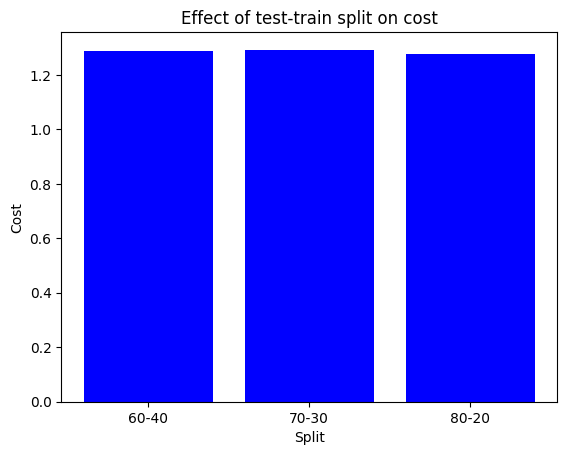

In [48]:
split_list = ['60-40', '70-30', '80-20']
cost_list = [J60[-1], J70[-1], J80[-1]]  #you are to add the LAST value of the cost from your model to this list for each split used

plt.bar(split_list, cost_list, color='blue')
plt.title('Effect of test-train split on cost')
plt.xlabel('Split')
plt.ylabel('Cost')

#### Effect of number of iterations

Use 70-30 split and learning rate = 0.1

In [49]:
n_epoch = 250
learning_rate = 0.1
theta5, J5 = gradient_descent_MLR(X_train_normalized, Y_train,learning_rate, n_epoch)

n_epoch = 500
learning_rate = 0.1
theta6, J6 = gradient_descent_MLR(X_train_normalized, Y_train,learning_rate, n_epoch)

n_epoch = 750
learning_rate = 0.1
theta7, J7 = gradient_descent_MLR(X_train_normalized, Y_train,learning_rate, n_epoch)

n_epoch = 1000
learning_rate = 0.1
theta8, J8 = gradient_descent_MLR(X_train_normalized, Y_train,learning_rate, n_epoch)

print(J5[-1], J6[-1], J7[-1], J8[-1]) 

1.2867904799528485 1.2867848829764559 1.286784881770144 1.2867848817698782


Plot the `final` value of the cost against each iteration.

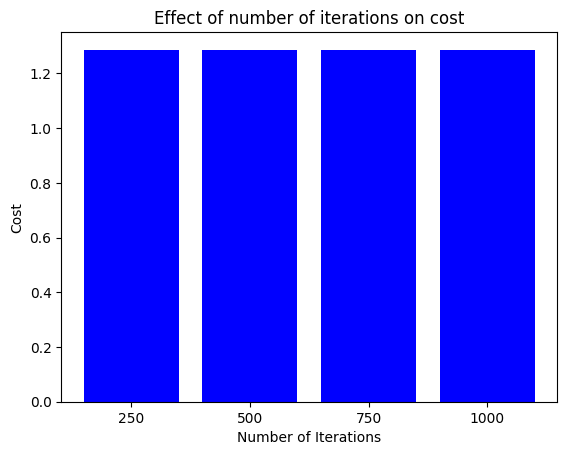

In [50]:
iter_list = ['250','500','750','1000'] 
cost_list = [J5[-1],J6[-1],J7[-1],J8[-1]]  #you are to add the LAST value of the cost from your model to this list for each iteration used

plt.bar(iter_list, cost_list, color='blue')
plt.title('Effect of number of iterations on cost')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')  #my j values are being calculated but there is some issue due to which the graph is not being plotted for first two
plt.show()

#### The effect of each change 

1) Effect of learning rate:
As learning rate decreases, the value of the cost increases slightly.

2. Effect of test_train split: As train data is increased, the value of the cost decreases, since there is more data to train the model.

3. Effect of number of iterations: As the number of iterations increases, cost deacreases, since the the model is trained more.